In [90]:
import pandas as pd
import numpy as np
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [10]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
path = '/content/drive/MyDrive/YU/rewe/snowflake/DATABASE_STORAGE_USAGE_HISTORY.csv'
df = pd.read_csv(path)
df

,Unnamed: 0,USAGE_DATE,DATABASE_ID,DATABASE_NAME,DELETED,AVERAGE_DATABASE_BYTES,AVERAGE_FAILSAFE_BYTES
0,0,2021-09-01,12,PC_FIVETRAN_DB,NaN,590848.0,0.000000e+00
1,1,2021-08-24,7,WEATHER,2021-08-19 07:54:35.057000-07:00,0.0,1.416704e+06
2,2,2021-09-08,13,GOOGLE_ADS_DEV,NaN,0.0,0.000000e+00
3,3,2021-08-22,6,CITIBIKE,2021-08-19 07:54:38.867000-07:00,0.0,9.804109e+09
4,4,2021-08-26,7,WEATHER,2021-08-19 07:54:35.057000-07:00,0.0,1.416704e+06
...,...,...,...,...,...,...,...
75,75,2021-08-23,7,WEATHER,2021-08-19 07:54:35.057000-07:00,0.0,1.416704e+06
76,76,2021-09-08,12,PC_FIVETRAN_DB,NaN,590848.0,0.000000e+00
77,77,2021-09-06,12,PC_FIVETRAN_DB,NaN,590848.0,0.000000e+00
78,78,2021-09-11,26,DEMO_DB,NaN,3072.0,0.000000e+00


In [47]:
df_db_usage = df[["USAGE_DATE", "AVERAGE_DATABASE_BYTES"]]

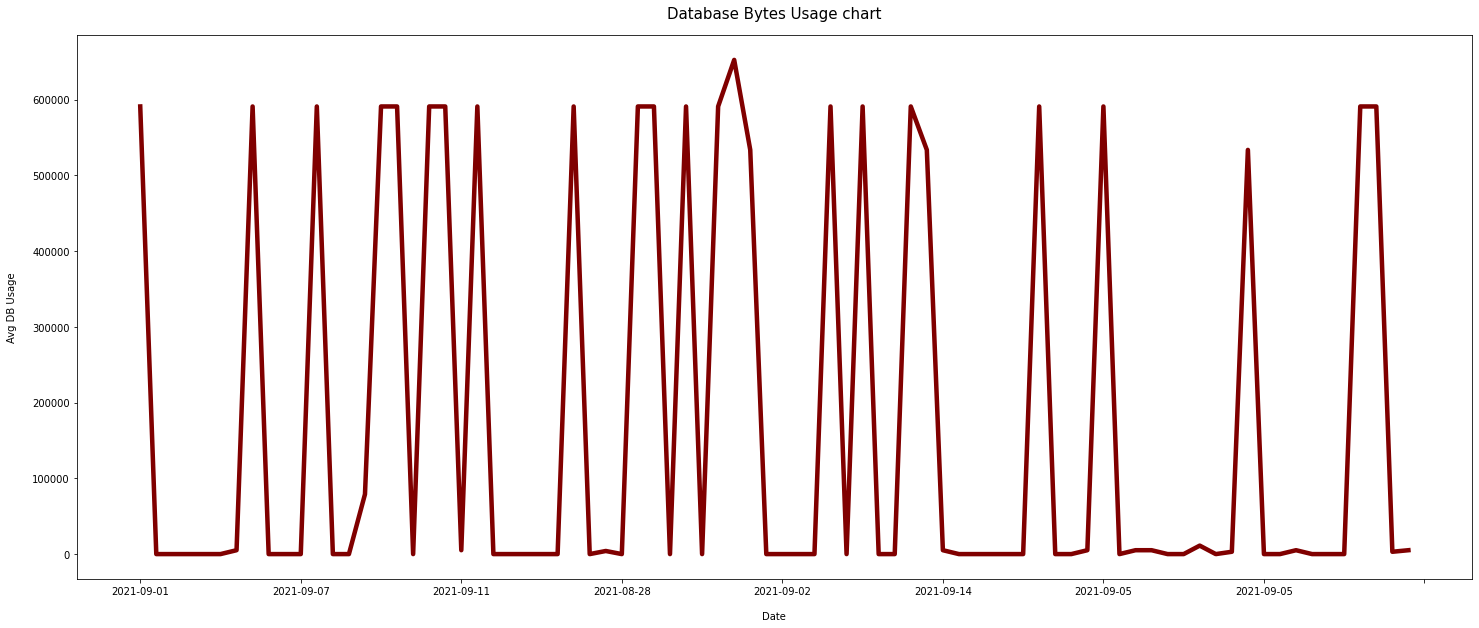

In [46]:
import matplotlib.pyplot as plt
df_db_usage.set_index('USAGE_DATE')['AVERAGE_DATABASE_BYTES'].plot(figsize=(25, 10), linewidth=4.5, color='maroon');
plt.xlabel("Date", labelpad=15)
plt.ylabel("Avg DB Usage", labelpad=15)
plt.title("Database Bytes Usage chart", y=1.02, fontsize=15);

In [54]:
path = '/content/drive/MyDrive/YU/rewe/snowflake/WAREHOUSE_METERING_HISTORY.csv'
df = pd.read_csv(path)
df

,Unnamed: 0,START_TIME,END_TIME,WAREHOUSE_ID,WAREHOUSE_NAME,CREDITS_USED,CREDITS_USED_COMPUTE,CREDITS_USED_CLOUD_SERVICES
0,0,2021-09-14 08:00:00-07:00,2021-09-14 09:00:00-07:00,1,COMPUTE_WH,0.247018,0.246111,0.000907
1,1,2021-09-13 08:00:00-07:00,2021-09-13 09:00:00-07:00,1,COMPUTE_WH,0.000904,0.000000,0.000904
2,2,2021-09-10 10:00:00-07:00,2021-09-10 11:00:00-07:00,1,COMPUTE_WH,0.355026,0.354444,0.000581
3,3,2021-09-13 01:00:00-07:00,2021-09-13 02:00:00-07:00,15,DEMMOOOO,0.035278,0.035278,0.000000
4,4,2021-09-11 02:00:00-07:00,2021-09-11 03:00:00-07:00,13,TWITTER_WH,0.001345,0.000000,0.001345
...,...,...,...,...,...,...,...,...
80,80,2021-09-06 07:00:00-07:00,2021-09-06 08:00:00-07:00,9,SF_TUTS_WH,0.177053,0.176389,0.000664
81,81,2021-09-09 03:00:00-07:00,2021-09-09 04:00:00-07:00,10,TF_DEMO,0.018063,0.018056,0.000007
82,82,2021-08-23 00:00:00-07:00,2021-08-23 01:00:00-07:00,3,ANALYTICS_WH,0.366766,0.366667,0.000099
83,83,2021-09-09 05:00:00-07:00,2021-09-09 06:00:00-07:00,1,COMPUTE_WH,1.050128,1.048333,0.001795


In [127]:
df_wh_usage = df.groupby(['WAREHOUSE_NAME']).sum()
df_wh_usage


,Unnamed: 0,WAREHOUSE_ID,CREDITS_USED,CREDITS_USED_COMPUTE,CREDITS_USED_CLOUD_SERVICES
WAREHOUSE_NAME,,,,,
ANALYTICS_WH,467,60,3.403824,3.401667,0.002157
CLOUD_SERVICES_ONLY,176,0,0.000497,0.000000,0.000497
COMPUTE_WH,2112,48,12.710894,12.686111,0.024782
DEMMOOOO,3,15,0.035278,0.035278,0.000000
DEMO_WAREHOUSE_PYTHON,95,30,0.125556,0.125556,0.000000
MKT_ANALYSIS,93,16,0.074022,0.073889,0.000134
PC_FIVETRAN_WH,23,7,0.467951,0.463889,0.004062
SF_TUTS_WH,325,54,0.647291,0.645556,0.001735
TF_DEMO,188,31,0.037526,0.037500,0.000026


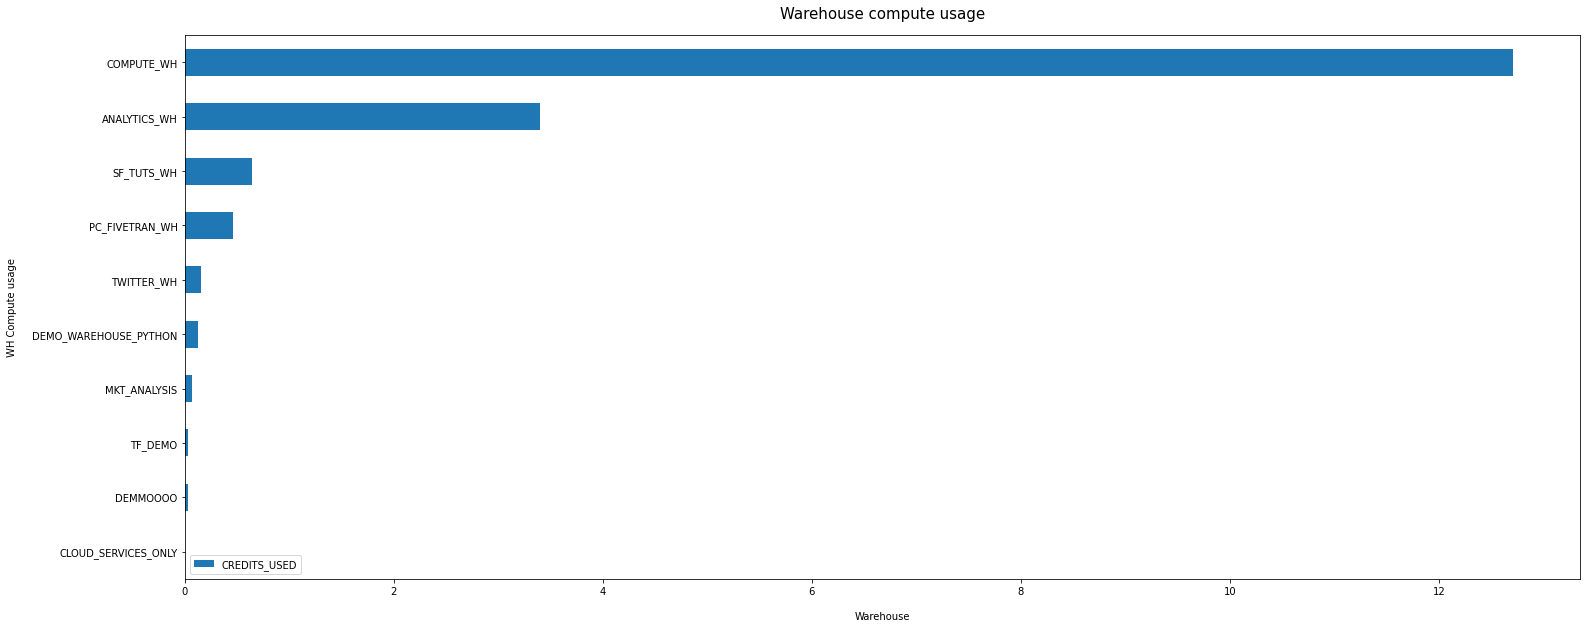

In [143]:
ax = df_wh_usage.sort_values(by=['CREDITS_USED']).plot.barh(y='CREDITS_USED', rot=0, figsize=(25, 10), linewidth=4.5)
  
plt.xlabel("Warehouse", labelpad=15)
plt.ylabel("WH Compute usage", labelpad=15)
plt.title("Warehouse compute usage", y=1.02, fontsize=15);
